In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yf 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date

In [3]:
# update code to use yfinance with padas_datareader
# code update for 2023: https://github.com/ranaroussi/yfinance
yf.pdr_override() # <== that's all it takes

In [6]:
stock_list = ['FXAIX','FSPGX','FOCPX','FSELX','FGRIX','FBNDX','FAGIX','FFRHX','FBALX','IVV','IWM','AGG','EFA']
start_date = '2019-01-01'
end_date = date.today()

In [7]:
df = data.get_data_yahoo(stock_list, data_source = 'yahoo', start=start_date, end=end_date)
df.head()

[*********************100%***********************]  13 of 13 completed


Adj Close                                                       
                  AGG        EFA     FAGIX      FBALX     FBNDX     FFRHX   
Date                                                                        
2018-12-31  95.924202  51.447403  6.793318  15.513015  6.760853  7.571788  \
2019-01-02  95.996246  51.342369  6.808300  15.550580  6.769667  7.571788   
2019-01-03  96.392601  50.878490  6.778338  15.325211  6.804925  7.588249   
2019-01-04  96.104355  52.436436  6.905664  15.670779  6.778482  7.670550   
2019-01-07  95.942215  52.637749  6.965587  15.760925  6.769667  7.728162   

                                                      ... Volume               
                FGRIX     FOCPX     FSELX      FSPGX  ...  FBALX FBNDX FFRHX   
Date                                                  ...                      
2018-12-31  28.195763  7.401032  5.959094  12.202749  ...      0     0     0  \
2019-01-02  28.347441  7.430786  6.034812  12.212150  ...      0     0     0   
2019-01-03  27.900818  7.177886  5.694077  11.836103  ...      0     0     0   
2019-01-04  28.785624  7.490291  5.936377  12.296762  ...      0     0     0   
2019-01-07  28.937302  7.609303  6.049957  12.428378  ...      0     0     0   

                                                              
           FGRIX FOCPX FSELX FSPGX FXAIX       IVV       IWM  
Date                                                          
2018-12-31     0     0     0     0     0  10117800  29173400  
2019-01-02     0     0     0     0     0   5980000  27295100  
2019-01-03     0     0     0     0     0   5831100  29294600  
2019-01-04     0     0     0     0     0   6430100  35355300  
2019-01-07     0     0     0     0     0   5961000  30477900  

[5 rows x 78 columns]

In [8]:
# Closing price
df = df['Adj Close']
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2018-12-31 to 2023-07-31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGG     1153 non-null   float64
 1   EFA     1153 non-null   float64
 2   FAGIX   1153 non-null   float64
 3   FBALX   1153 non-null   float64
 4   FBNDX   1153 non-null   float64
 5   FFRHX   1153 non-null   float64
 6   FGRIX   1153 non-null   float64
 7   FOCPX   1153 non-null   float64
 8   FSELX   1153 non-null   float64
 9   FSPGX   1153 non-null   float64
 10  FXAIX   1153 non-null   float64
 11  IVV     1153 non-null   float64
 12  IWM     1153 non-null   float64
dtypes: float64(13)
memory usage: 158.4 KB


In [9]:
df.head()

,AGG,EFA,FAGIX,FBALX,FBNDX,FFRHX,FGRIX,FOCPX,FSELX,FSPGX,FXAIX,IVV,IWM
Date,,,,,,,,,,,,,
2018-12-31,95.924202,51.447403,6.793318,15.513015,6.760853,7.571788,28.195763,7.401032,5.959094,12.202749,80.840485,232.926941,126.386070
2019-01-02,95.996246,51.342369,6.808300,15.550580,6.769667,7.571788,28.347441,7.430786,6.034812,12.212150,80.942589,233.028748,127.103439
2019-01-03,96.392601,50.878490,6.778338,15.325211,6.804925,7.588249,27.900818,7.177886,5.694077,11.836103,78.956383,227.205765,124.828674
2019-01-04,96.104355,52.436436,6.905664,15.670779,6.778482,7.670550,28.785624,7.490291,5.936377,12.296762,81.666496,235.195007,129.491455
2019-01-07,95.942215,52.637749,6.965587,15.760925,6.769667,7.728162,28.937302,7.609303,6.049957,12.428378,82.241966,236.778015,131.756805


In [10]:
# Resample the full dataframe to monthly timeframe
monthly_df = df.resample("BMS").first()

# Calculate daily returns of stocks
returns_daily = df.pct_change()

# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
print(returns_monthly.tail())

                 AGG       EFA     FAGIX     FBALX     FBNDX     FFRHX   
Date                                                                     
2023-03-01 -0.039008 -0.034215 -0.017455 -0.034567 -0.035566  0.004960  \
2023-04-03  0.036812  0.033993  0.012143  0.042544  0.032757  0.003574   
2023-05-01 -0.008852  0.019698  0.001080  0.006456 -0.011004  0.001099   
2023-06-01  0.001812 -0.024350 -0.009709  0.016519 -0.001391 -0.009879   
2023-07-03 -0.007862  0.028270  0.015250  0.030519 -0.008357  0.016630   

               FGRIX     FOCPX     FSELX     FSPGX     FXAIX       IVV   
Date                                                                     
2023-03-01 -0.028689 -0.042777  0.006522 -0.034858 -0.038962 -0.039063  \
2023-04-03  0.014467  0.084982  0.085853  0.076298  0.045418  0.044676   
2023-05-01  0.010236  0.011479 -0.054468  0.008809  0.011399  0.011684   
2023-06-01 -0.014367  0.068091  0.210859  0.058628  0.014856  0.015311   
2023-07-03  0.052117  0.040625  0.063

In [11]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:    
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

                AGG       EFA         FAGIX         FBALX         FBNDX   
AGG    1.834849e-05  0.000030  1.033993e-05  1.912294e-05  1.793402e-05  \
EFA    2.977627e-05  0.000070  2.371295e-05  3.249961e-05  2.910045e-05   
FAGIX  1.033993e-05  0.000024  9.455742e-06  1.251136e-05  1.041348e-05   
FBALX  1.912294e-05  0.000032  1.251136e-05  2.674466e-05  1.867561e-05   
FBNDX  1.793402e-05  0.000029  1.041348e-05  1.867561e-05  1.825714e-05   
FFRHX  7.837632e-07  0.000002  8.833043e-07  9.297189e-07  7.584761e-07   
FGRIX  1.462978e-05  0.000030  1.206328e-05  2.108746e-05  1.363426e-05   
FOCPX  2.293186e-05  0.000048  1.801721e-05  3.569524e-05  2.314814e-05   
FSELX  3.800076e-05  0.000087  3.360794e-05  5.432324e-05  3.934635e-05   
FSPGX  2.160199e-05  0.000038  1.524768e-05  3.518843e-05  2.183051e-05   
FXAIX  1.751658e-05  0.000030  1.221673e-05  2.676637e-05  1.694075e-05   
IVV    1.746006e-05  0.000032  1.236937e-05  2.516664e-05  1.681155e-05   
IWM    3.582140e-05  0.00

### Calculate portfolios
We'll now generate portfolios to find each month's best one. numpy's random.random() generates random numbers from a uniform distribution, then we normalize them so they sum to 1. We use these weights to calculate returns and volatility. Returns are sums of weights times individual returns. Volatility is more complex, and involves the covariances of the different stocks.

Finally we'll store the values in dictionaries for later use, with months' dates as keys.

**In this case, we will only generate 10 portfolios for each date so the code will run faster, but in a real-world use-case you'd want to use more like 1000 to 5000 randomly-generated portfolios for a few stocks.**


In [13]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# Get portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(1000):
        weights = np.random.random(13) #no of random is no of stock in portfolio
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)
        
print(portfolio_weights[date][0])

[0.09636268 0.05707427 0.0297608  0.02948796 0.07451317 0.08472097
 0.0628563  0.09394326 0.07391319 0.0788558  0.11327088 0.10466533
 0.10057539]


### Plot efficient frontier
Create a plot of Efficient Frontier for the latest date of the data

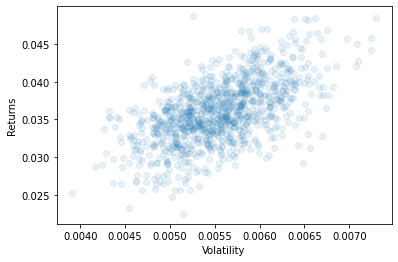

In [14]:
# Get latest date of available data
date = sorted(covariances.keys())[-1]  

# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date],  alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## Get optimal porfolio weight using Sharpe ratios

### Getting the best Sharpe ratio

In [15]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
        # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

0.048664293286541566


### Calculate exponentially-weighted moving average (EWMA) of daily returns
We will now work towards creating some features to be able to predict our ideal portfolios. We will simply use the price movement as a feature for now. To do this we will create a daily exponentially-weighted moving average (EWMA), then resample that to the monthly timeframe. Finally, we'll shift the monthly moving average of price one month in the future, so we can use it as a feature for predicting future portfolios.

In [16]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean() #calculate 30 days average. This number can change to find the best model

# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

print(ewma_monthly.iloc[-1])

AGG      0.000135
EFA     -0.000641
FAGIX   -0.000017
FBALX    0.001168
FBNDX   -0.000001
FFRHX   -0.000294
FGRIX    0.000263
FOCPX    0.003269
FSELX    0.009586
FSPGX    0.003015
FXAIX    0.001383
IVV      0.001392
IWM      0.000193
Name: 2023-07-03 00:00:00, dtype: float64


### Make features and targets
To use machine learning to pick the best portfolio, we need to generate features and targets. Our features were just created in the last exercise – the exponentially weighted moving averages of prices. Our targets will be the best portfolios we found from the highest Sharpe ratio.

In [17]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():

    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features

targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

[[0.02414396 0.01280591 0.08901509 0.01572865 0.03511109 0.11953425
  0.09795911 0.02558167 0.15331525 0.08185298 0.14993658 0.06488148
  0.13013398]
 [0.16660875 0.09467656 0.04839172 0.0471523  0.21607659 0.01115109
  0.0109005  0.12056194 0.02226557 0.17274761 0.04532298 0.02859654
  0.01554785]
 [0.02220165 0.14377431 0.07200828 0.07494033 0.08044189 0.15455014
  0.08783062 0.07104975 0.00313869 0.08290769 0.082343   0.0988138
  0.02599984]
 [0.10699059 0.00380953 0.01329583 0.05218787 0.18637167 0.0406035
  0.11111057 0.09662037 0.20736626 0.0285249  0.03445604 0.05104669
  0.06761618]
 [0.01907481 0.00598623 0.0173365  0.04187819 0.00813356 0.14369172
  0.08213338 0.00184651 0.01555145 0.20448386 0.10875388 0.17797851
  0.1731514 ]]


### Plot efficient frontier with best Sharpe ratio

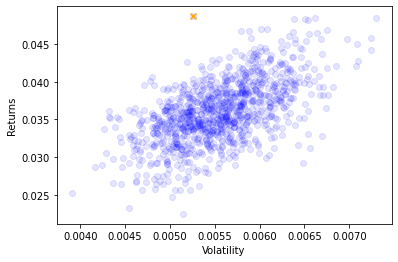

In [18]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.1, color='blue')
best_idx = max_sharpe_idxs[date]

# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

-----

In [19]:
growth_df = df.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
growth_df.head()

,AGG,EFA,FAGIX,FBALX,FBNDX,FFRHX,FGRIX,FOCPX,FSELX,FSPGX,FXAIX,IVV,IWM
Date,,,,,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.075106,-0.204158,0.220544,0.242153,0.130366,0.000000,0.537946,0.402021,1.270636,0.077035,0.126303,0.043708,0.567601
2019-01-03,0.488301,-1.105814,-0.220508,-1.210624,0.651880,0.217391,-1.046061,-3.015065,-4.447263,-3.004616,-2.330641,-2.456211,-1.232253
2019-01-04,0.187808,1.922415,1.653775,1.016981,0.260753,1.304336,2.092020,1.206030,-0.381208,0.770419,1.021780,0.973724,2.457063
2019-01-07,0.018778,2.313714,2.535857,1.598081,0.130366,2.065212,2.629966,2.814074,1.524783,1.849000,1.733638,1.653340,4.249468


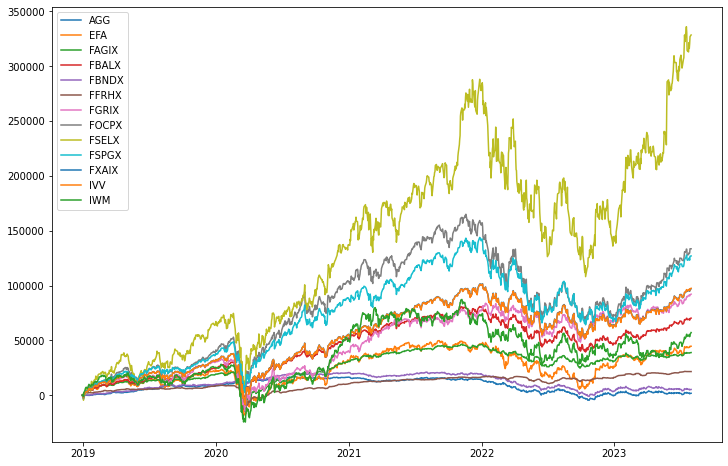

In [20]:
plt.figure(figsize=(12,8))
plt.plot(growth_df*1000) #Started with $1000 for each ETF
plt.legend(growth_df)
plt.show()

<Axes: xlabel='Date'>

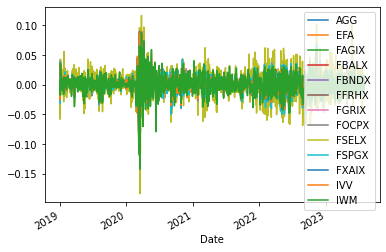

In [21]:
df_usd = df
log_ret = np.log(df_usd/df_usd.shift(1))
log_ret.plot()

In [22]:
np.random.seed(123)
num_ports = 5000
all_weights = np.zeros((num_ports, len(df_usd.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
rf = 0.04 #risk-free rate of treasury bond
for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(df_usd.columns))) #number of random weight equal number of tickers
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252)) #crypto trading is 365 days/year, stock trading 252 days/year
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x]-rf)/vol_arr[x]

In [23]:
print('Max Sharpe ratio in the array: {}'.format(sharpe_arr.max()))

#numpy.argmax Returns the indices of the maximum values along an axis.

print('Index of max Sharpe ratio in the array: {}'.format(sharpe_arr.argmax())) 

Max Sharpe ratio in the array: 0.592320725044829
Index of max Sharpe ratio in the array: 4675


In [24]:
print('Max Sharpe ratio allocation: {}'.format(all_weights[sharpe_arr.argmax(),:]))

Max Sharpe ratio allocation: [0.02761908 0.00287715 0.04483416 0.01020876 0.04957629 0.16044611
 0.09389762 0.10481223 0.19022284 0.14477561 0.06472062 0.09228351
 0.01372601]


In [25]:
#print expected return of max sharpe ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
print('Return of portfolio with highest Sharpe ratio: {}'.format(max_sr_ret))
# Print expected volatility of portfolio with highest Sharpe ratio
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print('Volatility of portfolio with highest Sharpe ratio: {}'.format(max_sr_vol))

Return of portfolio with highest Sharpe ratio: 0.15631578154242906
Volatility of portfolio with highest Sharpe ratio: 0.19637297265535636


In [26]:
#print expected return of minimum volatility
min_vol_ret = ret_arr[vol_arr.argmin()]
print('Return of portfolio with : {}'.format(min_vol_ret))
# Print miminum volatility
min_vol = vol_arr.min()
print('Lowest volatility: {}'.format(min_vol))

Return of portfolio with : 0.07652991478036184
Lowest volatility: 0.10800165462974588


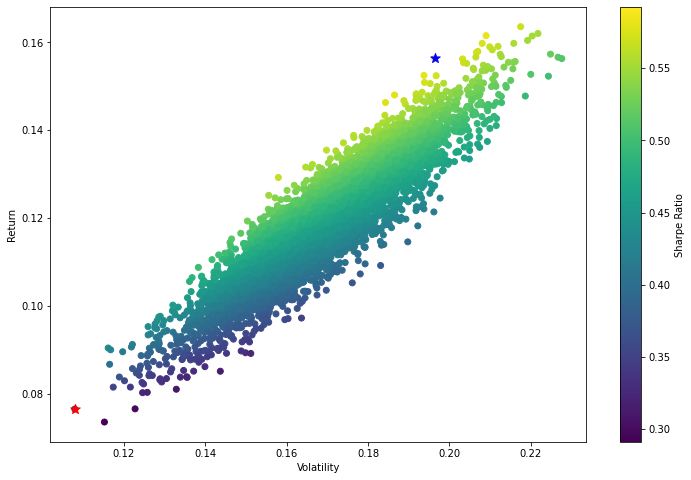

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='blue', s=100, marker = '*') # red dot
plt.scatter(min_vol, min_vol_ret,c='red', s=100, marker = '*') # black dot
plt.show()

In [38]:
max_sharp_df = pd.DataFrame(all_weights[sharpe_arr.argmax(),:])
max_sharp_df.head()

,0
0,0.027619
1,0.002877
2,0.044834
3,0.010209
4,0.049576


In [39]:
max_sharp_df

,0
0,0.027619
1,0.002877
2,0.044834
3,0.010209
4,0.049576
5,0.160446
6,0.093898
7,0.104812
8,0.190223
9,0.144776


In [37]:
all_weights

array([[0.10017113, 0.04115459, 0.03262738, ..., 0.04935829, 0.10485709,
        0.06307857],
       [0.00920706, 0.06140996, 0.11385736, ..., 0.09426824, 0.11145801,
        0.04982585],
       [0.06063069, 0.03825371, 0.04922234, ..., 0.07145048, 0.14971945,
        0.15822794],
       ...,
       [0.12026752, 0.08640927, 0.00926247, ..., 0.00092177, 0.13510319,
        0.04337864],
       [0.11471596, 0.00197443, 0.07750689, ..., 0.05341128, 0.13863852,
        0.04860149],
       [0.10751004, 0.12502141, 0.04314597, ..., 0.06868634, 0.06005244,
        0.07597324]])